/var/folders/jj/9j0c_6196zx24tx5jb3ngnym0000gn/T/ipykernel_1249/43774852.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="1993-04-01")
[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open  Volume      gain  \
Date                                                                       
1993-04-21  24.740585  24.810081  24.671089  24.810081   67900  0.000000   
1993-04-22  24.427868  24.844844  24.427868  24.636356   97700  0.000000   
1993-04-23  24.323622  24.445240  24.288874  24.375744  106000  0.000000   
1993-04-26  24.132507  24.427866  24.063011  24.340996   62600  0.000000   
1993-04-27  24.393116  24.393116  24.097758  24.097758  156800  0.260609   

Price           loss  avg_gain  avg_loss        RSI  Strategy  \
Date                                                            
1993-04-21  0.017385  0.043437  0.064536  40.229595       NaN   
1993-04-22  0.312717  0.043437  0.086873  33.333682       0.0   
1993-04-23  0.104246  0.043437  0.057087  43.210563       0.0   
1993-04-26  0.191114  0.034749  0.070738  32.941269       0.0   
1993-04-27 -0.000000  0.053364  0.065774  44.791561       0.0   

Price      

Price,Close,High,Low,Open,Volume,gain,loss,avg_gain,avg_loss,RSI,Strategy,asset_cum_returns,strategy_cum_returns
Date,,,,,,,,,,,,,
1993-04-21,24.740585,24.810081,24.671089,24.810081,67900,0.000000,0.017385,0.043437,0.064536,40.229595,NaN,NaN,NaN
1993-04-22,24.427868,24.844844,24.427868,24.636356,97700,0.000000,0.312717,0.043437,0.086873,33.333682,0.0,-0.012640,0.000000
1993-04-23,24.323622,24.445240,24.288874,24.375744,106000,0.000000,0.104246,0.043437,0.057087,43.210563,0.0,-0.016853,0.000000
1993-04-26,24.132507,24.427866,24.063011,24.340996,62600,0.000000,0.191114,0.034749,0.070738,32.941269,0.0,-0.024578,0.000000
1993-04-27,24.393116,24.393116,24.097758,24.097758,156800,0.260609,-0.000000,0.053364,0.065774,44.791561,0.0,-0.014045,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-10-27,685.239990,685.539978,682.119995,682.729980,63339800,7.989990,-0.000000,3.217852,2.066424,60.894854,0.0,26.697000,2.899262
2025-10-28,687.059998,688.909973,684.830017,687.049988,61738100,1.820007,-0.000000,3.062853,2.066424,59.713157,0.0,26.770564,2.899262
2025-10-29,687.390015,689.700012,682.869995,688.719971,85657100,0.330017,-0.000000,3.086426,1.927137,61.561525,0.0,26.783903,2.899262


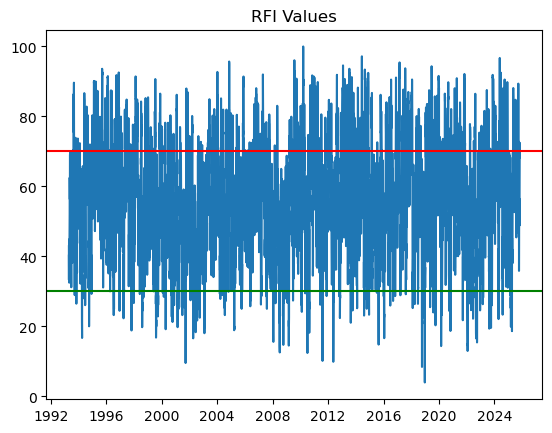

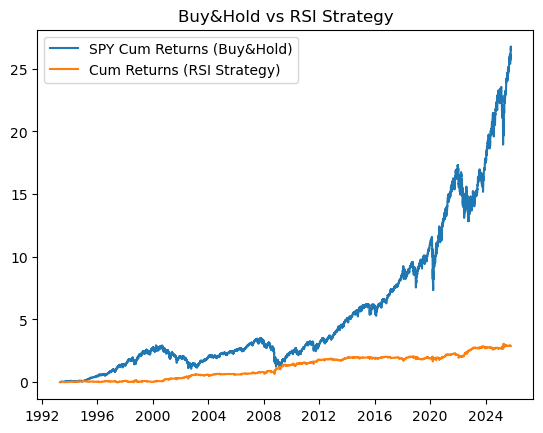

In [ ]:
import yfinance as yf
import numpy as np 
import matplotlib.pyplot as plt

TICKER = "SPY"
RSI_LENGTH = 14
OVERBROUGHT = 70
OVERSOLD = 30
LOOKBACK = 10000

# How the RSI works: it ossilates between 0 and 100, 
# When it reaches 70, it means it is overbrought and they should come down soon 
# When it reaches 30, it means it is undersold and they should come up soon
# --> It is used to enter or exit trades or shift in momentum along other indicators 

def get_data(ticker = TICKER):
    df = yf.download(ticker, start="1993-04-01")
    df.columns = df.columns.get_level_values(0)
    # Only return the subset of data you are interested in
    return df.iloc[-LOOKBACK:,:]

def add_RSI(df, length = RSI_LENGTH):
        # Step 1: Define Delta (== Change in Prices from One Day to the next)
    price_change = df["Close"].diff()
    # Debug/Print Code: print(df["Close"].head(5))
    # Debug/Print Code: print(price_change[:5])
    # This inbuilt diff function shows the difference between the rows 

        # Step 2: Separate Gains & Losses (We group Price Changes based on Pos/Neg Returns)
    df["gain"] = price_change.where(price_change > 0, 0)
    df["loss"] = - price_change.where(price_change < 0, 0)
    # Start with the price_changes Series
    # Keep the original values, whereever (price_change > 0) is true
    # Replace the original values with 0, whereever (price_change > 0) is False 

        # Step 3: "Rolling" means to take the MA of the RSI_LENGTH (a number of days)   
    df["avg_gain"] = df["gain"].rolling(window=length).mean()
    df["avg_loss"] = df["loss"].rolling(window=length).mean()

        # Step 4: Calculate the Relative Strength  
    # What percentage of each other have the gains and losses been?
    # "What percentage of the average loss is the average gain?"
    # "How much stronger have the Up Days been compared to the Down days"
    rs = df["avg_gain"] / df["avg_loss"]
    # if rs = 3. Then the average gain was 3x larger than the average loss --> Shows strong Upward Momentum 
    # if rs = 0.5. Then the average gain was half the size of the average loss --> Shows strong Downward momentum

        # Step 5: Calculate the RSI (Standardization - Keep values between 0-100)
    # If rs is 1, then we get to 50. Which is the perfect midpoint. 
    df["RSI"] = 100 - (100/ (1+rs))

        # Step 6: Plot the RSI 
    plt.figure()
    plt.plot(df["RSI"])
    plt.title("RFI Values")

    # Plot horizontal lines for Overbrought/Oversold
    plt.axhline(OVERBROUGHT, color="red")
    # When the indicator line is above the red line --> asset overbought/overvalued     
    # Short Signal (Sell) triggered when the indicator line crosses above the red line
    plt.axhline(OVERSOLD, color="green")
    # When the indicator line is below this green line --> asset oversold/undervalued 
    # Long Signal (Buy) triggered when the indicator line crosses above the green line

    # Since it takes 14 days to calculate the first RSI, lets drop NaN values
    return df.dropna()

def add_strategy(df, overbrought=OVERBROUGHT, oversold=OVERSOLD):
    df["Strategy"] = np.where(df["RSI"] > overbrought, -1,
                    np.where(df["RSI"] < oversold, 1, 0))
    # Short Signal: -1 (Over the Overbrought Threshold)
    # Long Signal: 1 (Under the Oversold Threshold)
    # Hold Signal: 0  (RSI not overbrought or oversold)
    # Shift the signal to prevent lookahead bias - we can only understand Data after it happens:
    df["Strategy"] = df["Strategy"].shift(1)

    return df

def test_strategy(df):
        # Step 1: Test Strategy 
    # Test for when we buy below OVERSOLD and sell above OVERBOUGHT (No positions inbetween)
    df["asset_cum_returns"] = (1 + df["Close"].pct_change()).cumprod() - 1 
    df["strategy_cum_returns"] = (1 + df["Close"].pct_change() * df["Strategy"]).cumprod() - 1

        # Step 2: Plot Returns
    plt.figure()
    plt.plot(df["asset_cum_returns"])
    plt.plot(df["strategy_cum_returns"])
    plt.legend([f"{TICKER} Cum Returns (Buy&Hold)", "Cum Returns (RSI Strategy)"])
    plt.title("Buy&Hold vs RSI Strategy")
    # In this graph we can recognize the compunding effect 
    
    return df

# To execute the function/visualize the Date Set:
def main():
    # Running the function to get the dataset and store it in df 
    df = get_data()
    df = add_RSI(df)
    df = add_strategy(df)
    df = test_strategy(df)

    # Test if it runs smoothly from the beginning
    print(df.head())
    # We can see that, when the Strategy = 0, we are not taking positions, which mens that 
    # our strategy's returns are 0, while the S&P starts compounding rigtht away 

    # Test if it runs smoothly at the end of it
    print(df.tail())
    # We can see that we made 23% while the S&P made 55% in the same amount of time
    # We can see here how important it is to backtest for a long time, 
    # Negative: For 300 days, it outperformed the S&P, but not when you set it for 10000 days
    # Positive: For 10000 days, it shows an upwards trends, so it can be useful using it harmony with another indicator
    # But we can prove with Confidence, that in the Long term, it does not work. 
    # Meaning, not every trade you place, you will win  
    return df

main()


/var/folders/jj/9j0c_6196zx24tx5jb3ngnym0000gn/T/ipykernel_1249/43774852.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="1993-04-01")
[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open  Volume     gain  \
Date                                                                      
1993-04-21  24.740595  24.810091  24.671099  24.810091   67900  0.00000   
1993-04-22  24.427864  24.844840  24.427864  24.636352   97700  0.00000   
1993-04-23  24.323606  24.445225  24.288858  24.375729  106000  0.00000   
1993-04-26  24.132498  24.427856  24.063002  24.340986   62600  0.00000   
1993-04-27  24.393127  24.393127  24.097769  24.097769  156800  0.26063   

Price           loss  avg_gain  avg_loss        RSI  Strategy  \
Date                                                            
1993-04-21  0.017359  0.043437  0.064534  40.230432       NaN   
1993-04-22  0.312731  0.043437  0.086872  33.334030       0.0   
1993-04-23  0.104258  0.043437  0.057089  43.209995       0.0   
1993-04-26  0.191109  0.034749  0.070739  32.941362       0.0   
1993-04-27 -0.000000  0.053366  0.065775  44.792212       0.0   

Price       asset_

Strategy
 0.0    6193
-1.0    1602
 1.0     396
Name: count, dtype: int64

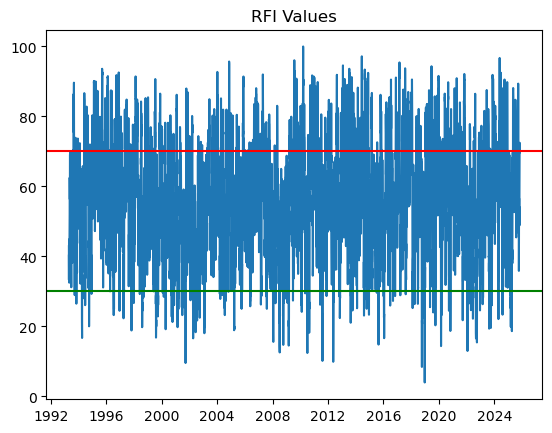

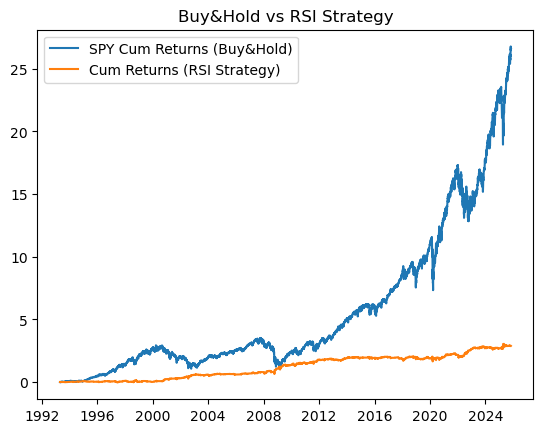

In [2]:
# To be able to visualize the following, we must define df 
df = main()
# Check the Strategy Column to make sure we have 0s and 1s
df["Strategy"].value_counts()
# Since this is daily price data, it shows on how many days we will long and on how many we will short 